
# Project: Investigate a Dataset "No-show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- 'No-show' indicated if the person showed up for the uppointment. It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

This work will investigate the factors that are important to predict if a patient will show up for their scheduled appointment. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Gather
Load data. 

In [2]:
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Check
Check data sructure and values.  

In [3]:
# 1. Have an oveview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# 2. Have an overview of the values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# 3. Calculate unique records
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
# 4. Calculate duplicated records
df.duplicated().sum()

0

In [7]:
# 5. Check the records with null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Summary

>Here is the list of required cleaning excercise: 
>* to change PatientId data type to an Integer,
>* to change ScheduledDay and AppointmentDay data types to a Date format,
>* drop a record with the age -1,
>* calculate how many visits each patient does,
>* calculate the waiting time, i.e. time difference within ScheduledDay and AppointmentDay. 


### Data Cleaning and Augmenting

**1. Clean column names**

In [8]:
# Clean column names, i.e. replace '-' with '_' and change the names to a lower case.  
df.rename (columns = {'No-show':'no_show'}, inplace = True)
df.rename(columns = lambda x: x.lower(), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**2. Change Patient ID data type**

In [9]:
# For Patient ID
df["patientid"]= df["patientid"].astype(int)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**3. Drop record with the age < 0**

In [10]:
# Find a record with the age smaller than 0 
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# Drop the record and verify
df=df.drop(df.index[99832])
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


**4. Calculate waiting time, i.e. time difference between an Appointment Day and Scheduled Day**

In [12]:
#Change format
df['appointmentday'] = pd.to_datetime (df['appointmentday'])
df['scheduledday'] = pd.to_datetime (df['scheduledday'])    
#Calculate time_diff, fix the format and convert into days
df['time_diff']=(df['appointmentday']-df['scheduledday']).astype('timedelta64[h]')/24
df['time_diff'].describe()

count    110526.000000
mean          9.693199
std          15.244321
min          -6.583333
25%          -0.375000
50%           3.458333
75%          14.291667
max         178.541667
Name: time_diff, dtype: float64

In [13]:
#Drop columns scheduledday, appointmentday
df.drop(['scheduledday','appointmentday'], axis=1, inplace=True)
df.head(1)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_diff
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-0.791667


**5. Count visits per patient**

In [14]:
# Add new column visits with the count of visits
df['visits'] = df.groupby('patientid')['patientid'].transform('size')
print ('Average number of visits per patient is :{}'.format(df.visits.mean()))

Average number of visits per patient is :3.5406510685268624


**6. Change no_show indication to 0 and 1 instead of Yes and No**

In [15]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})
df.head(1)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_diff,visits
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-0.791667,2


In [16]:
print ('The percentage of missed appointments is: {}%' .format (round(df.no_show.mean()*100)))

The percentage of missed appointments is: 20%


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question - What is the differences between the patients who missed an appointment and who didn't ? 

In [17]:
# Calculate the differences of mean
df.query('no_show==0').mean()-df.query('no_show==1').mean()

patientid        9.286054e+11
appointmentid    2.887679e+04
age              3.472838e+00
scholarship     -2.160286e-02
hipertension     3.539022e-02
diabetes         9.766706e-03
alcoholism       8.418686e-05
handcap          2.445351e-03
sms_received    -1.470335e-01
no_show         -1.000000e+00
time_diff       -7.056468e+00
visits           5.099246e-01
dtype: float64

#### Summary
> Patients who missed an appointment on average tend to:
> * be 3.5 years younger,
> * be part of the scholarship program,
> * have less health problems,
> * receive more SMS notifications,
> * wait for the appointment 7 days longer,
> * rare visitors in the medical institution. 

### Research Question - How does the age influence? 

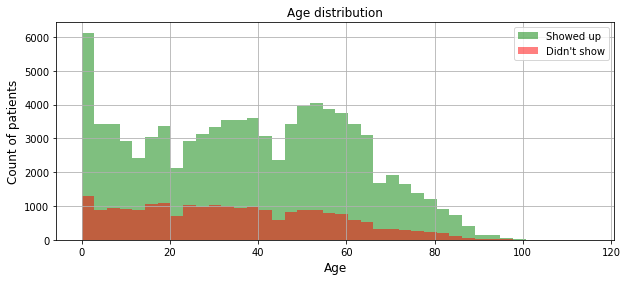

In [18]:
#Plot age distribution
df.query('no_show=="0"')['age'].hist(label='Showed up', figsize=(10,4), color='g',alpha=0.5, bins=40);
df.query('no_show=="1"')['age'].hist(label="Didn't show", figsize=(10,4), color='r',alpha=0.5, bins=40);
plt.legend()
plt.title('Age distribution', size=12)
plt.ylabel('Count of patients',size=12)
plt.xlabel('Age',size=12)
plt.show();

#### Summary
> * The most common patients are babies.
> * The population is comparably young. 
> * The number of missed appointments has similar distribution with the number of showed up appointments.  

**Analysis of missed appointment cases**

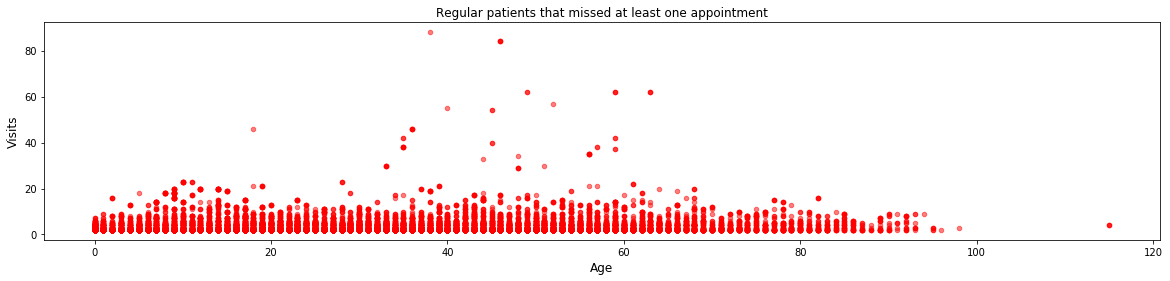

In [19]:
#Scatterplot age and visits
df.query('visits>1 and no_show=="1"').plot(x='age', y='visits',kind='scatter',figsize=(20,4), color='r', alpha=0.5)
plt.title('Regular patients that missed at least one appointment', size=12)
plt.xlabel('Age',size=12)
plt.ylabel('Visits',size=12);

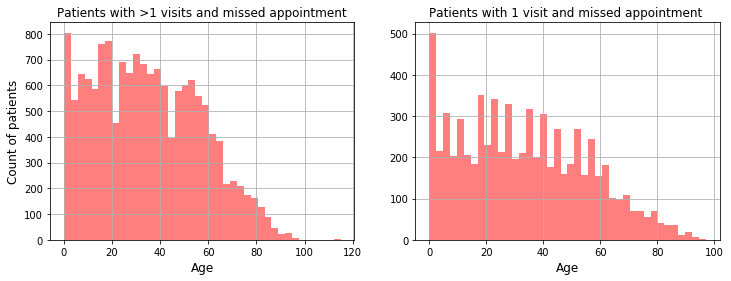

In [20]:
# Plot the patient age who had a single visit and several visits 
plt.subplot(1, 2, 1)
df.query('visits!=1 and no_show=="1"')['age'].hist(color='r',alpha=0.5, figsize=(12,4),bins=40);
plt.title('Patients with >1 visits and missed appointment', size=12)
plt.ylabel('Count of patients',size=12)
plt.xlabel('Age',size=12)
plt.subplot(1, 2, 2)
df.query('visits == 1 and no_show=="1"')['age'].hist(color='r',alpha=0.5,figsize=(12,4),bins=40);
plt.title('Patients with 1 visit and missed appointment ', size=12)
plt.xlabel('Age',size=12);

In [21]:
print('Percentage of patients that had a single appointment and missed it: {}%'.format (round((df.query('visits == 1 and no_show=="1"')['patientid'].nunique()/df.shape[0])*100)))
print('Percentage of patients that had several appointments where at least one of them was missed: {}%'.format (round((df.query('visits != 1 and no_show=="1"')['patientid'].nunique()/df.patientid.nunique())*100)))

Percentage of patients that had a single appointment and missed it: 6%
Percentage of patients that had several appointments where at least one of them was missed: 17%


#### Summary
> * 6% of the patients had a single visit that was missed. Biggest age group is babies. 
> * 17% of the regular patients are tend to miss an appointment. Biggest age group is babies.

### Research Question - How does a neighbourhood influence? 

**Every neighbourhood receives different amount of patients, therefore normalisation is required. The percentage of missed appointments per each neighbourhood is calculated below.**

In [22]:
# Count No appointments per neighbourhood
no = df.query('no_show == "1"').drop(['patientid', 'gender','age', 'sms_received', 'no_show', 'time_diff','scholarship','hipertension','diabetes','alcoholism','handcap','visits'], axis=1)
no = no.groupby(['neighbourhood']).count().rename(columns={'appointmentid':'no_count'})
no.head()

,no_count
neighbourhood,
AEROPORTO,1
ANDORINHAS,521
ANTÔNIO HONÓRIO,50
ARIOVALDO FAVALESSA,62
BARRO VERMELHO,91


In [23]:
# Count Yes appointments per neighbourhood
yes = df.query('no_show == "0"').drop(['patientid', 'gender','age', 'sms_received', 'no_show', 'time_diff','scholarship','hipertension','diabetes','alcoholism','handcap','visits'], axis=1)
yes = yes.groupby(['neighbourhood']).count().rename(columns={'appointmentid':'yes_count'})
yes.head()

,yes_count
neighbourhood,
AEROPORTO,7
ANDORINHAS,1741
ANTÔNIO HONÓRIO,221
ARIOVALDO FAVALESSA,220
BARRO VERMELHO,332


In [24]:
#Merge two lists and calculate percentage of no
total = no.merge(yes, left_on='neighbourhood', right_on='neighbourhood', how='inner')
total['no_perc'] = round(total['no_count']*100 / (total['no_count'] + total['yes_count']),2)
total.head()

,no_count,yes_count,no_perc
neighbourhood,,,
AEROPORTO,1,7,12.50
ANDORINHAS,521,1741,23.03
ANTÔNIO HONÓRIO,50,221,18.45
ARIOVALDO FAVALESSA,62,220,21.99
BARRO VERMELHO,91,332,21.51


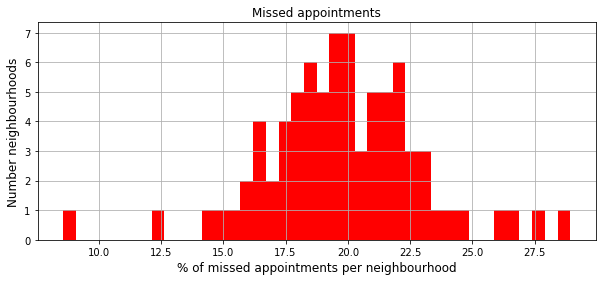

In [25]:
#Plot the results
total['no_perc'].hist(figsize=(10,4), color='r', bins=40);
plt.title('Missed appointments',size=12)
plt.ylabel('Number neighbourhoods', size=12)
plt.xlabel('% of missed appointments per neighbourhood', size=12)
plt.show()


#### Summary
> * The percentage of missed appointment is normally distrubuted across all the neighbourhoods. 

**Let's take the neighbourhoods with the highest and lowest percentages and comparie the characteristics of the patients. We'll see if we find any differences in comparison with the full data set.**

In [26]:
# Compare the means 
merged=df.merge(total, left_on='neighbourhood', right_on='neighbourhood', how='inner')
merged.query('no_perc<17').mean() - merged.query('no_perc>20').mean()

patientid        2.556300e+12
appointmentid    1.715715e+03
age              5.255138e+00
scholarship     -3.116874e-02
hipertension     3.033963e-02
diabetes         1.145283e-02
alcoholism       1.214896e-02
handcap          9.355130e-03
sms_received     4.243049e-03
no_show         -6.331286e-02
time_diff       -2.150197e-01
visits          -8.249508e-02
no_count        -1.686371e+02
yes_count        1.001708e+02
no_perc         -6.331838e+00
dtype: float64

#### Summary

>After comparing the patients from different neighbourhoods we can see: 
> * Neighbourhoods with a higher percentage of missed appointments have higher scholarship program patients.
> * Patients with less health problems are tend to miss an appointments more.
> * Neighbourhoods with a lower percentage of missed appointments delivered more SMS notifications.
> * Patients tend to miss an appointment when the waiting time is longer.
> * Regular patients are tend to miss an appointment less (which is consistent with the second statement if we interpretate that regular patients should have more health problems).


### Research Question - How does a waiting time influence?

**Let's plot a distribution with the waiting times.**

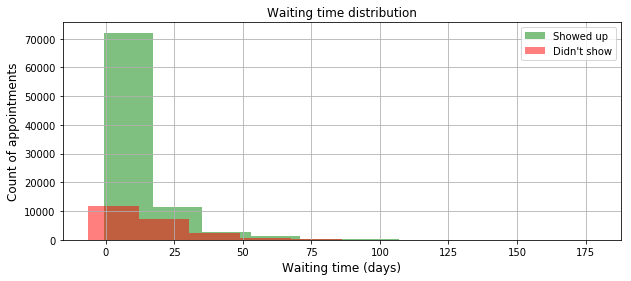

In [27]:
df.query('no_show == 0')['time_diff'].hist(label='Showed up', figsize=(10,4), color='g', alpha=0.5);
df.query('no_show == 1')['time_diff'].hist(label="Didn't show", figsize=(10,4), color='r',alpha=0.5);
plt.legend()
plt.title('Waiting time distribution', size=12)
plt.ylabel('Count of appointments',size=12)
plt.xlabel('Waiting time (days)',size=12)
plt.show();

#### Summary

> I see that there are cases where an Appointment day is earlier than the Scheduled day. Business expolanation is needed for these cases. It might be fraud cases or just an overpass of bureaucratic issues, however in any case this seems to be more common for the missed appointments. 

**Let's check how the median differs for the cases when the patient came or missed an appointment.**

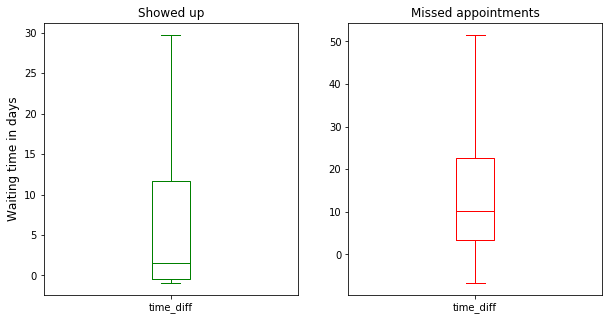

In [28]:
plt.subplot(1, 2, 1)
df.query('no_show==0')['time_diff'].plot(kind='box', figsize=(10,5), color='g',showfliers=False);
plt.title('Showed up', size=12)
plt.ylabel('Waiting time in days',size=12)
plt.subplot(1, 2, 2,)
df.query('no_show==1')['time_diff'].plot(kind='box',figsize=(10,5), color='r',showfliers=False);
plt.title('Missed appointments',size=12);

#### Summary

> * The waiting time median is much higher for the missed appointments. p.s.: the y scales are different in the pic.

**Waiting time requires classification** 

In [29]:
# Create a dataset and classify waiting time by weeks
waiting = df.drop(['patientid', 'neighbourhood','gender','age', 'scholarship','hipertension','diabetes','alcoholism','handcap','visits'], axis=1)
labels=['0 waiting','< 1 week','< 2 weeks','< 3 weeks','< 4 weeks', '< 6month']
edges=[-8,0,7,14,21,28,180]
waiting['level']=pd.cut(waiting['time_diff'],edges,labels=labels)
waiting.head()

,appointmentid,sms_received,no_show,time_diff,level
0,5642903,0,0,-0.791667,0 waiting
1,5642503,0,0,-0.708333,0 waiting
2,5642549,0,0,-0.708333,0 waiting
3,5642828,0,0,-0.750000,0 waiting
4,5642494,0,0,-0.708333,0 waiting


ValueError: color kwarg must have one color per data set. 88207 data sets and 1 colors were provided

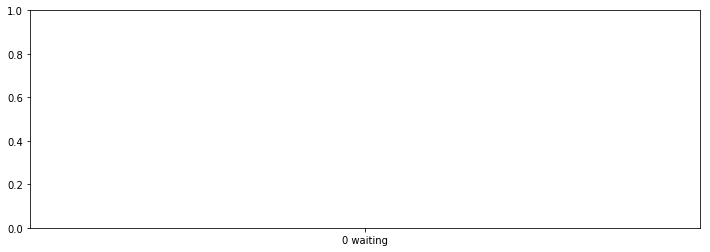

In [30]:
# Plot the results
waiting.query('no_show=="0"')['level'].hist(label = 'Showed up',figsize=(12,4), color='g', bins=20)
waiting.query('no_show=="1"')['level'].hist(label = "Didn't show", figsize=(12,4), color='r', bins=20);
plt.title('Waiting time distribution',size=12)
plt.ylabel('Number of appointments',size=12)
plt.xlabel('Category',size=12)
plt.legend()
plt.show();

#### Summary

> * The percentage of missed appointment increases dramatically when the waiting time is longer than 1 week.

### Research Question - Does an SMS notification have an impact? 

**1. SMS delivery for the patients that missed an appointment**

In [ ]:
# Average SMS delivery depending on the waiting time. 
waiting.query('no_show==1').groupby(['level'])['sms_received'].mean()

**2. SMS delivery for the patients that showed up**

In [ ]:
# Average SMS delivery depending on the waiting time.  
waiting.query('no_show==0').groupby(['level'])['sms_received'].mean()

#### Summary

> * Patients that missed an appointment have a lower SMS delivery rate. 

<a id='conclusions'></a>
## Conclusions

> * 6% of the patients had a single visit that was missed. Majority of the patients were babies.
> * 17% of the regular patients (more than 1 visit) missed an appointment at least once. Majority of the patients were babies.
> * Neighbourhoods with a higher participation in scholarship program, might have a higher percentage of missed appointments. 
> * Patients with less health problems (not regular patients or with less number of visits) are tend to miss an appointments more. 
> * The percentage of missed appointment increases dramatically when the waiting time is longer than 1 week.
> * SMS reminders might have an impact when the waiting time is longer than 1 week.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])